# Resizing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
import os
from datasets import load_from_disk
from PIL import Image
from PIL import Image, UnidentifiedImageError

#-------------------------------------------------------------------------------
# Paramétrage de lancement
#-------------------------------------------------------------------------------
# Chemin pour charger le dataset (à adapter selon votre chemin local)
results_dir = '/content/drive/MyDrive/formation Datascientest/RVL-CDIP/'
data_final_dir = '/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/data_final/'
train_dataset_path = os.path.join(results_dir, 'train_dataset_ID')
val_dataset_path = os.path.join(results_dir, 'val_dataset_ID')
test_dataset_path = os.path.join(results_dir, 'test_dataset_ID')
#-------------------------------------------------------------------------------
# Paramétrage de lancement
#-------------------------------------------------------------------------------

# Charger le dataset enregistré
# train_dataset = load_from_disk(train_dataset_path)
val_dataset = load_from_disk(val_dataset_path)
test_dataset = load_from_disk(test_dataset_path)

# Fonction pour redimensionner les images avec gestion des exceptions
def resize_image(example):
    try:
        example['image'] = example['image'].resize((224, 224))
    except UnidentifiedImageError:
        example['image'] = None  # Marquer cet exemple en mettant l'image à None
    except Exception as e:
        print(f"Erreur inattendue lors du redimensionnement: {e}")
        example['image'] = None  # Marquer cet exemple en mettant l'image à None
    return example

# Appliquer le redimensionnement à chaque image du dataset
#train_dataset_resized = train_dataset.map(resize_image, batched=False).filter(lambda x: x is not None)
test_dataset_resized = test_dataset.map(resize_image, batched=False).filter(lambda x: x is not None)
val_dataset_resized = val_dataset.map(resize_image, batched=False).filter(lambda x: x is not None)



# Sauvegarder le dataset redimensionné
# train_dataset_resized.save_to_disk(os.path.join(data_final_dir, 'train_dataset_ID_Resize'))
val_dataset_resized.save_to_disk(os.path.join(data_final_dir, 'val_dataset_ID_Resize'))
test_dataset_resized.save_to_disk(os.path.join(data_final_dir, 'test_dataset_ID_Resize'))

print("Redimensionnement terminé et dataset sauvegardé.")


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/40000 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/40000 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/40000 [00:00<?, ? examples/s]

Redimensionnement terminé et dataset sauvegardé.


In [ ]:
#suppression de la mauvaise image dans le test
from datasets import load_from_disk
import os

# Charger le dataset depuis le disque
data_final_dir = '/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/data_final/'
dataset = load_from_disk(os.path.join(data_final_dir, 'test_dataset_ID_Resize'))

# Fonction pour vérifier si une image est None ou si elle pose problème
def is_valid_image(example):
    # Vérifier si le champ image est bien là et qu'il n'est pas None
    if 'image' not in example or example['image'] is None:
        return False
    return True

# Filtrer les exemples où l'image n'est pas None
filtered_dataset = dataset.filter(is_valid_image)

# Sauvegarder le dataset filtré
filtered_dataset.save_to_disk(os.path.join(data_final_dir, 'test_dataset_ID_Resize2'))  # Remplace avec le chemin où tu veux sauvegarder

print("Dataset filtré et sauvegardé avec succès.")

Filter:   0%|          | 0/40000 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/39999 [00:00<?, ? examples/s]

Dataset filtré et sauvegardé avec succès.


# tensorflow generator with image_ID

In [ ]:
import tensorflow as tf
from datasets import load_from_disk
from tqdm import tqdm
import os

#-------------------------------------------------------------------------------
# Paramétrage de lancement
#-------------------------------------------------------------------------------
# Chemins vers les datasets réduits
data_final_dir = '/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/data_final/'

# Chemin pour sauvegarder les TensorFlow datasets
save_path = "/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/data_tf/"

# Assurer que le dossier de sauvegarde existe
os.makedirs(save_path, exist_ok=True)

# Charger les datasets
train_dataset = load_from_disk(os.path.join(data_final_dir, 'train_dataset_ID_Resize'))
val_dataset = load_from_disk(os.path.join(data_final_dir, 'val_dataset_ID_Resize'))
test_dataset = load_from_disk(os.path.join(data_final_dir, 'test_dataset_ID_Resize2_nettoyé'))

#-------------------------------------------------------------------------------
# Affichage du nombre d'images dans chaque dataset
#-------------------------------------------------------------------------------
print(f"Nombre d'images dans le dataset d'entraînement : {len(train_dataset)}")
print(f"Nombre d'images dans le dataset de validation : {len(val_dataset)}")
print(f"Nombre d'images dans le dataset de test : {len(test_dataset)}")

#-------------------------------------------------------------------------------
# Convertir en tf.data.Dataset tout en incluant les image_ID
#-------------------------------------------------------------------------------
def to_tf_dataset(dataset, batch_size=32):
    def generator():
        for example in tqdm(dataset, total=len(dataset)):
            image = tf.expand_dims(example['image'], axis=-1)  # Ajouter une dimension de canal pour grayscale
            yield image, example['label'], example['image_ID']

    dataset_tf = tf.data.Dataset.from_generator(
        generator,
        output_signature=(
            tf.TensorSpec(shape=(224, 224, 1), dtype=tf.float32),  # Image grayscale avec un canal
            tf.TensorSpec(shape=(), dtype=tf.int64),  # Label
            tf.TensorSpec(shape=(), dtype=tf.string)  # Image ID
        )
    )

    # Batching et shuffling
    dataset_tf = dataset_tf.batch(batch_size).shuffle(buffer_size=1000)

    # Préchargement des données en avance pour optimiser les performances
    dataset_tf = dataset_tf.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset_tf

# Générer les tf.data.Datasets
batch_size = 32
train_dataset_tf = to_tf_dataset(train_dataset, batch_size=batch_size)
val_dataset_tf = to_tf_dataset(val_dataset, batch_size=batch_size)
test_dataset_tf = to_tf_dataset(test_dataset, batch_size=batch_size)

#-------------------------------------------------------------------------------
# Prétraitement des images
#-------------------------------------------------------------------------------
def preprocess_images(image, label, image_ID):
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, label, image_ID

# Application du prétraitement aux datasets
train_dataset_tf = train_dataset_tf.map(preprocess_images, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset_tf = val_dataset_tf.map(preprocess_images, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset_tf = test_dataset_tf.map(preprocess_images, num_parallel_calls=tf.data.AUTOTUNE)

#-------------------------------------------------------------------------------
# Sauvegarde des datasets TensorFlow incluant les image_ID
#-------------------------------------------------------------------------------
train_dataset_save_path = os.path.join(save_path, 'train_tf_dataset_ID')
val_dataset_save_path = os.path.join(save_path, 'val_tf_dataset_ID')
test_dataset_save_path = os.path.join(save_path, 'test_tf_dataset_ID')

train_dataset_tf.save(train_dataset_save_path)
val_dataset_tf.save(val_dataset_save_path)
test_dataset_tf.save(test_dataset_save_path)

print(f"Les datasets TensorFlow ont été sauvegardés dans : {save_path}")




Nombre d'images dans le dataset d'entraînement : 320000
Nombre d'images dans le dataset de validation : 40000
Nombre d'images dans le dataset de test : 39999


100%|██████████| 39999/39999 [01:40<00:00, 397.08it/s]


Les datasets TensorFlow ont été sauvegardés dans : /content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/data_tf/


# check tensorflow datasets

In [ ]:
# Chemin pour charger les TensorFlow datasets
load_path = "/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/data_tf/"

#-------------------------------------------------------------------------------
# Vérification des datasets sauvegardés
#-------------------------------------------------------------------------------
def verify_tf_dataset(dataset_path, dataset_name):
    try:
        # Recharger le dataset TensorFlow sauvegardé
        loaded_dataset = tf.data.Dataset.load(dataset_path)

        # Vérifier le nombre d'éléments dans le dataset
        count = loaded_dataset.cardinality().numpy()
        print(f"{dataset_name} : {count} exemples chargés avec succès.")

        # Afficher quelques exemples pour vérifier les données
        for image, label, image_ID in loaded_dataset.take(2):
            print(f"Exemple du dataset {dataset_name}:")
            print(f"  - Label : {label.numpy()}")
            print(f"  - Image shape : {image.shape}")
            print(f"  - Image ID : {image_ID.numpy()}")
    except Exception as e:
        print(f"Erreur lors du chargement du dataset {dataset_name}: {e}")

# Vérifier les 3 datasets sauvegardés
train_dataset_load_path = os.path.join(load_path, 'train_tf_dataset_ID')
val_dataset_load_path = os.path.join(load_path, 'val_tf_dataset_ID')
test_dataset_load_path = os.path.join(load_path, 'test_tf_dataset_ID')

verify_tf_dataset(train_dataset_load_path, 'Dataset d\'entraînement')
verify_tf_dataset(val_dataset_load_path, 'Dataset de validation')
verify_tf_dataset(test_dataset_load_path, 'Dataset de test')


Dataset d'entraînement : 10000 exemples chargés avec succès.
Exemple du dataset Dataset d'entraînement:
  - Label : [ 0  8  7  9 15  0  5 11 11  1 14  2  5  7  7  1  0  6 13 11 10 10 14  5
  8 13 15 10  9  7 15  2]
  - Image shape : (32, 224, 224, 1)
  - Image ID : [b'e4c86bd9-183f-4d38-9667-9037ff309468'
 b'a8a05af3-a0d6-4346-8916-aeedf57aeb46'
 b'3ebe8b95-8ad8-4fca-8c6d-ab5344e1450e'
 b'bff52c91-a87c-45a5-a41a-9faa35eb0ca9'
 b'55ec1d6b-14fe-4ae5-9efc-85b4628fc001'
 b'9bdebcc8-8630-4e54-87bf-d66e29e4000e'
 b'aa81ee72-8a83-480d-9c8c-16120e514734'
 b'76587ecf-0451-4066-84bb-1ba43c262a43'
 b'3cea1bb8-8bf4-4446-a937-789de33f9d15'
 b'821dfc54-855d-4d90-a543-b6cc65e882bd'
 b'aa7b9828-90cd-4b42-9415-bda01b41d422'
 b'1ca1b0df-5bce-4805-a183-bc0b3d7605aa'
 b'92ff8c19-56b3-47e9-9442-efd847046874'
 b'28829d39-d3ac-4f3d-9cdd-df29414d25d6'
 b'330581c2-52ef-44e6-a092-af040b134ce9'
 b'4166d1d5-3522-46ea-9f70-16489ccbc58a'
 b'0634020a-8327-46d8-93bd-efa6120c2106'
 b'd91bfbf8-0322-4b32-97e1-2bb16357f1

# CNN training

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, mixed_precision
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

#-------------------------------------------------------------------------------
# Paramétrage de lancement
#-------------------------------------------------------------------------------
mixed_precision.set_global_policy('mixed_float16')

print("GPUs disponibles :", tf.config.list_physical_devices('GPU'))

# Charger les datasets TensorFlow déjà prêts
train_dataset_tf_path = "/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/data_tf/train_tf_dataset"
val_dataset_tf_path = "/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/data_tf/val_tf_dataset"
saved_model_path = '/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/saved_modelcnn'
log_dir = "/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/log_cnn/fit_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
history_path = '/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/history_cnn/training_vgg16_history.npy'
#-------------------------------------------------------------------------------
# Paramétrage de lancement
#-------------------------------------------------------------------------------

# Chargement et optimisation des datasets TensorFlow
train_dataset_tf = tf.data.Dataset.load(train_dataset_tf_path).prefetch(tf.data.AUTOTUNE)
val_dataset_tf = tf.data.Dataset.load(val_dataset_tf_path).prefetch(tf.data.AUTOTUNE)

# Construire le modèle VGG16 adapté aux images grayscale (224, 224, 1)
def build_vgg16_grayscale(input_shape=(224, 224, 1), num_classes=16):
    # Charger VGG16 sans la couche de tête (top)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Créer une nouvelle entrée pour grayscale
    inputs = tf.keras.Input(shape=input_shape)

    # Convertir les images grayscale en pseudo-RGB en répétant le canal 3 fois
    x = layers.Conv2D(3, (3, 3), padding='same', activation='relu')(inputs)

    # Passer les données à travers le reste du modèle VGG16
    x = base_model(x)

    # Ajouter les couches denses et de classification
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Créer le modèle final
    model = models.Model(inputs, outputs)

    return model

# Construire le modèle VGG16 adapté aux images grayscale
model = build_vgg16_grayscale(input_shape=(224, 224, 1), num_classes=16)

# Compiler le modèle
initial_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

# Définir le batch_size
batch_size = 16

# Calculer les steps per epoch pour l'entraînement
steps_per_epoch = train_dataset_tf.cardinality().numpy() // batch_size
validation_steps = val_dataset_tf.cardinality().numpy() // batch_size

# Créer un répertoire pour stocker les logs du TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)

# Callbacks

early_stopping = EarlyStopping(
    monitor='val_loss',      # Surveiller la validation loss
    patience=5,              # Nombre d'époques sans amélioration avant d'arrêter
    verbose=1,
    restore_best_weights=True  # Restaurer les poids du meilleur modèle
)

# Entraîner le modèle avec les callbacks
history = model.fit(
    train_dataset_tf,
    validation_data=val_dataset_tf,
    epochs=40,  # Ajuster selon la performance
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[tensorboard_callback, early_stopping]
)

# Sauvegarder le modèle entraîné
saved_model_path = '/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/saved_modelcnn.keras'
model.save(saved_model_path)
saved_model_path = '/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/saved_modelcnn.h5'
model.save(saved_model_path)

# Récupérer les données d'entraînement
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Créer les sous-plots pour la précision et la perte
plt.figure(figsize=(12, 6))

# Précision
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Perte
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Afficher les graphiques
plt.show()

# Sauvegarder l'historique d'entraînement
np.save(history_path, history.history)



print(f"Modèle VGG16 sauvegardé à : {saved_model_path}")


GPUs disponibles : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 3)         │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           8,208 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,568,494 (105.17 MB)

 Trainable params: 27,568,494 (105.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 54ms/step - accuracy: 0.2004 - loss: 2.5831 - val_accuracy: 0.4635 - val_loss: 1.7834
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.4993 - loss: 1.6362 - val_accuracy: 0.6603 - val_loss: 1.0885
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6475 - loss: 1.1660 - val_accuracy: 0.7119 - val_loss: 0.9448
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7105 - loss: 0.9812 - val_accuracy: 0.7308 - val_loss: 0.9163
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.7312 - loss: 0.8936 - val_accuracy: 0.7756 - val_loss: 0.7681
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7628 - loss: 0.8115 - val_accuracy: 0.7720 - val_loss: 0.7597
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7715 - loss: 0.7634 - val_accuracy: 0.7897 - val_loss: 0.6912
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7839 - loss: 0.7305 - 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8594 - val_loss: 0.5921
Epoch 18/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8396 - loss: 0.5550 - val_accuracy: 0.8554 - val_loss: 0.5003
Epoch 19/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8405 - loss: 0.5329 - val_accuracy: 0.8570 - val_loss: 0.4720
Epoch 20/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.8449 - loss: 0.5241 - val_accuracy: 0.8530 - val_loss: 0.4876
Epoch 21/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8495 - loss: 0.5089 - val_accuracy: 0.8570 - val_loss: 0.4754
Epoch 22/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8507 - loss: 0.4972 - val_accuracy: 0.8554 - val_loss: 0.4800
Epoch 23/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8567 - loss: 0.4888 - val_accuracy: 0.8598 - val_loss: 0.4768
Epoch 24/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8589 - loss: 0.4729 

AttributeError: 'Functional' object has no attribute 'save_pretrained'

In [ ]:
saved_model_path = '/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/saved_modelcnn.keras'
model.save(saved_model_path)
saved_model_path = '/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/saved_modelcnn.h5'
model.save(saved_model_path)

# Rapport graphique

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 41ms/step - accuracy: 0.8571 - loss: 0.4845
Test Loss: 0.4840112626552582, Test Accuracy: 0.8560463786125183
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━

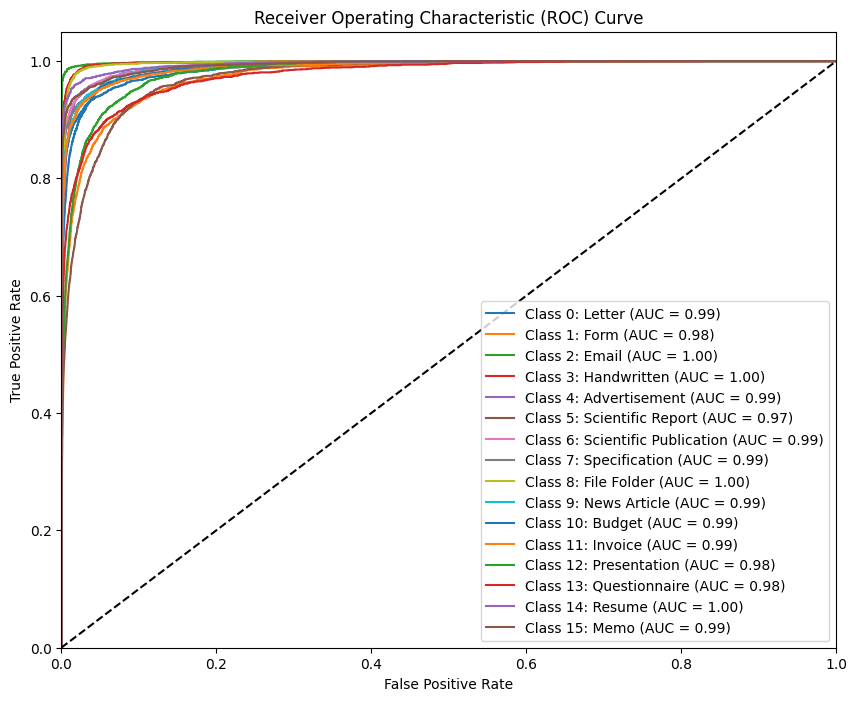

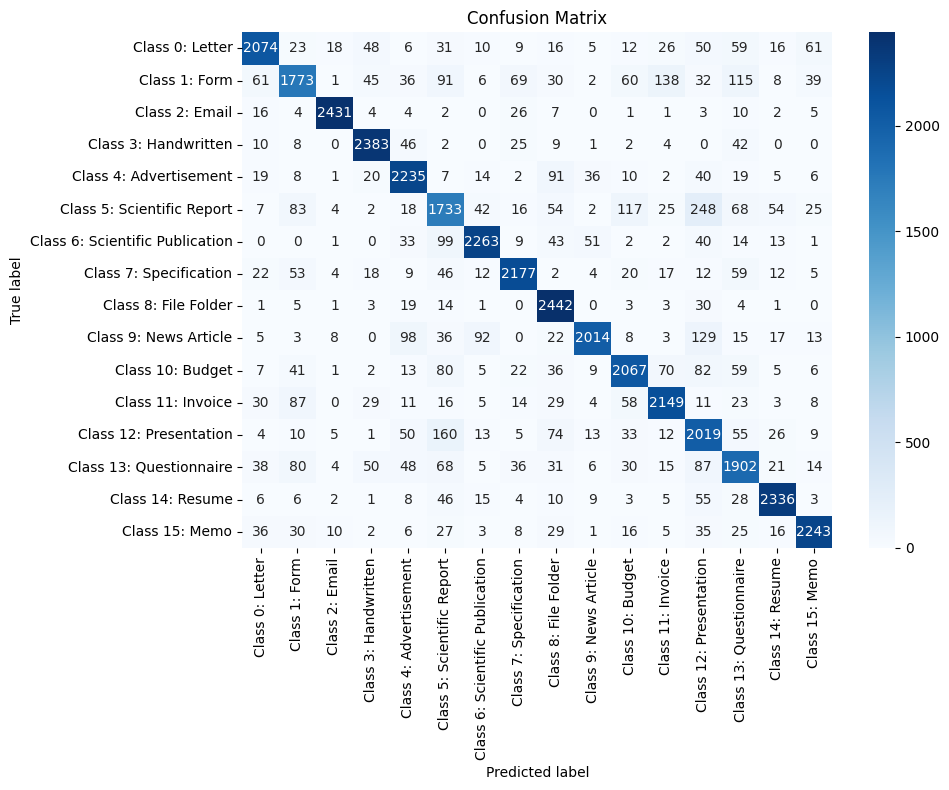

Classification Report (Console Output):
                                 precision    recall  f1-score   support

                Class 0: Letter       0.89      0.84      0.86      2464
                  Class 1: Form       0.80      0.71      0.75      2506
                 Class 2: Email       0.98      0.97      0.97      2516
           Class 3: Handwritten       0.91      0.94      0.93      2532
         Class 4: Advertisement       0.85      0.89      0.87      2515
     Class 5: Scientific Report       0.71      0.69      0.70      2498
Class 6: Scientific Publication       0.91      0.88      0.89      2571
         Class 7: Specification       0.90      0.88      0.89      2472
           Class 8: File Folder       0.83      0.97      0.90      2527
          Class 9: News Article       0.93      0.82      0.87      2463
               Class 10: Budget       0.85      0.83      0.84      2505
              Class 11: Invoice       0.87      0.87      0.87      2477
         C

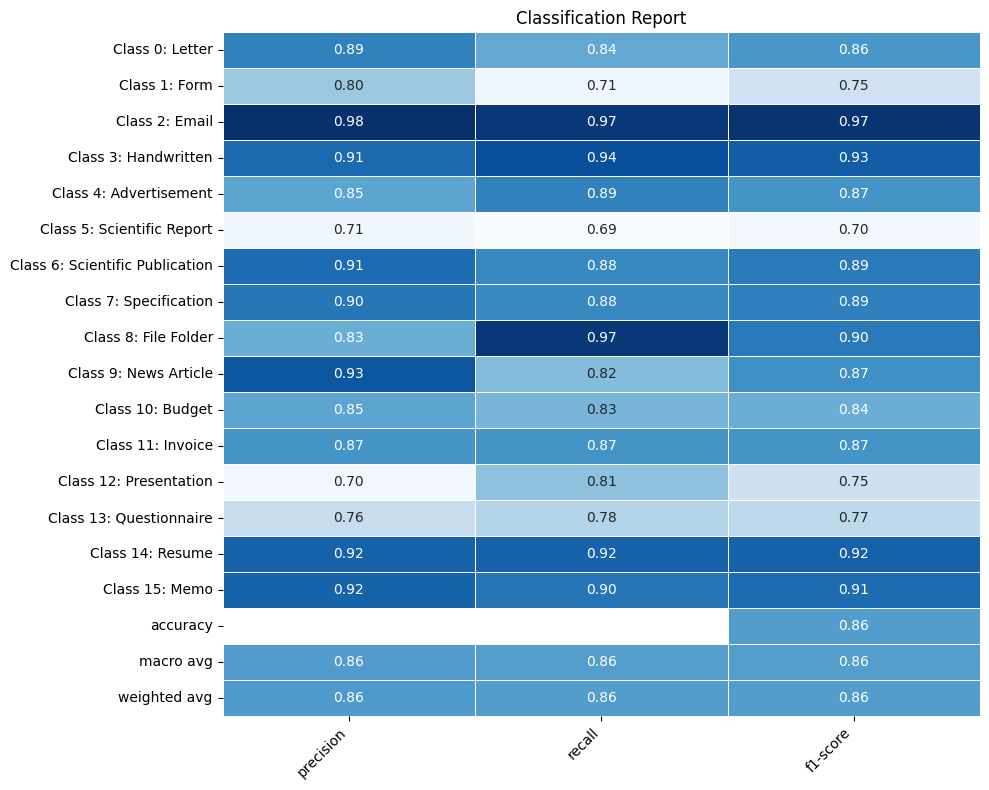

Training history not found, skipping learning curves plot.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
import json

#-------------------------------------------------------------------------------
# Paramétrage de lancement
#-------------------------------------------------------------------------------
# Chemin vers le modèle sauvegardé et le dataset de test
model_path = "/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/saved_modelcnn.keras"
test_dataset_tf_path = "/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/data_tf/test_tf_dataset"
output_file_path = "/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/classification_vgg16_report.json"
history_path = '/content/drive/MyDrive/formation Datascientest/jul24_bds_extraction/history_cnn/training_vgg16_history.npy'
#-------------------------------------------------------------------------------
# Paramétrage de lancement
#-------------------------------------------------------------------------------

# Charger le modèle
model = tf.keras.models.load_model(model_path)

# Charger le dataset TensorFlow de test
test_dataset_tf = tf.data.Dataset.load(test_dataset_tf_path)

# Évaluer le modèle
test_loss, test_acc = model.evaluate(test_dataset_tf)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

# Faire les prédictions sur le dataset de test
y_true = []  # Pour stocker les vraies étiquettes
y_pred_probs = []  # Pour stocker les probabilités prédites pour chaque classe

for images, labels in test_dataset_tf:
    y_true.extend(labels.numpy())  # Sauvegarder les vraies étiquettes
    y_pred_probs.extend(model.predict(images))  # Sauvegarder les probabilités prédites

y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)

# Convertir les étiquettes en format one-hot encoding (nécessaire pour ROC multi-classes)
n_classes = 16  # Le nombre de classes
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Calculer fprs, tprs, aucs pour chaque classe
fprs = {}
tprs = {}
aucs = {}
for i in range(n_classes):
    fprs[i], tprs[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    aucs[i] = auc(fprs[i], tprs[i])

# Les noms des labels associés aux classes avec le numéro
class_labels = ['Class 0: Letter', 'Class 1: Form', 'Class 2: Email', 'Class 3: Handwritten',
                'Class 4: Advertisement', 'Class 5: Scientific Report', 'Class 6: Scientific Publication',
                'Class 7: Specification', 'Class 8: File Folder', 'Class 9: News Article',
                'Class 10: Budget', 'Class 11: Invoice', 'Class 12: Presentation',
                'Class 13: Questionnaire', 'Class 14: Resume', 'Class 15: Memo']

# Tracer la courbe ROC avec les noms des labels et numéros de classes
plt.figure(figsize=(10, 8))
for i, (fpr, tpr, roc_auc) in enumerate(zip(fprs.values(), tprs.values(), aucs.values())):
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Matrice de confusion**
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convertir les probabilités en classes
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# **Rapport de classification sous forme de tableau**
# 1. **Afficher le rapport de classification dans la console (sans `output_dict`)**
report_console = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report (Console Output):")
print(report_console)

# 2. **Sauvegarder le rapport de classification dans un fichier JSON ou CSV avec `output_dict=True`**
report_dict = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)

# Sauvegarder en JSON
with open(output_file_path, 'w') as f:
    json.dump(report_dict, f, indent=4)

print(f"Classification report saved to {output_file_path}")

# 3. **Convertir le rapport de classification en DataFrame pour l'afficher
report_df = pd.DataFrame(report_dict).transpose()

# Supprimer les colonnes 'precision' et 'recall' pour la ligne 'accuracy'
report_df.loc['accuracy', ['precision', 'recall']] = [None, None]

# Affichage du rapport sous forme de tableau (plot)
plt.figure(figsize=(10, 8))
sns.heatmap(report_df.iloc[:, :-1], annot=True, fmt=".2f", cmap="Blues", cbar=False, linewidths=0.5)
plt.title('Classification Report')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# **Courbes d'apprentissage (si historique disponible)
try:
    history = np.load(history_path, allow_pickle=True).item()

    plt.figure(figsize=(12, 6))

    # Précision
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Perte
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.savefig('learning_curves.png')
    plt.show()
except FileNotFoundError:
    print("Training history not found, skipping learning curves plot.")